In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [23]:
df = pd.read_csv("estudiantes_limpio.csv")

In [24]:
df.head(5)

,genero,edad,presionAcademica,satisfaccionEstudios,sueno,alimentacion,suicidio,horasEstudio,estresFinanciero,antecedentes,depresion
0,Masculino,28,2,4,7-8 horas,Moderados,Yes,9,2,Yes,No
1,Masculino,28,4,5,5-6 horas,Saludables,Yes,7,1,Yes,No
2,Masculino,25,1,3,5-6 horas,No saludables,Yes,10,4,No,Yes
3,Masculino,23,1,4,Más de 8 horas,No saludables,Yes,7,2,Yes,No
4,Femenino,31,1,5,Más de 8 horas,Saludables,Yes,4,2,Yes,No


In [47]:
df["suicidio"] = df["suicidio"].replace({"Yes": 1,"No": 0})

df["antecedentes"] = df["antecedentes"].replace({"Yes": 1,"No": 0})

df["depresion"] = df["depresion"].replace({"Yes": 1,"No": 0})

map_sueno = {
    "7-8 horas": 1,
    "5-6 horas": 2,
    "Más de 8 horas": 3,
    "Menos de 5 horas": 4
}

if "sueno" in df.columns:
    df["sueno"] = df["sueno"].map(map_sueno).fillna(0)

map_alimentacion = {
    "Moderados": 1,
    "Saludables": 2,
    "No saludables": 3
}

if "alimentacion" in df.columns:
    df["alimentacion"] = df["alimentacion"].map(map_alimentacion).fillna(0)

map_genero = {
    "Masculino": 1,
    "Femenino": 2
}

if "genero" in df.columns:
    df["genero"] = df["genero"].map(map_genero).fillna(0)

X = df.drop(columns=["depresion"])
y = df["depresion"]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

joblib.dump(model, "modelo_logistico.pkl")

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.92      0.96      0.94        51

    accuracy                           0.94       101
   macro avg       0.94      0.94      0.94       101
weighted avg       0.94      0.94      0.94       101



['modelo_logistico.pkl']

               Variable  Coeficiente
6              suicidio     4.957171
2      presionAcademica     1.817114
8      estresFinanciero     1.114651
9          antecedentes     0.764045
7          horasEstudio     0.343941
0                genero     0.000000
5          alimentacion     0.000000
4                 sueno     0.000000
1                  edad    -0.335820
3  satisfaccionEstudios    -1.108479
Intercepto (bias): -1.612708391313506


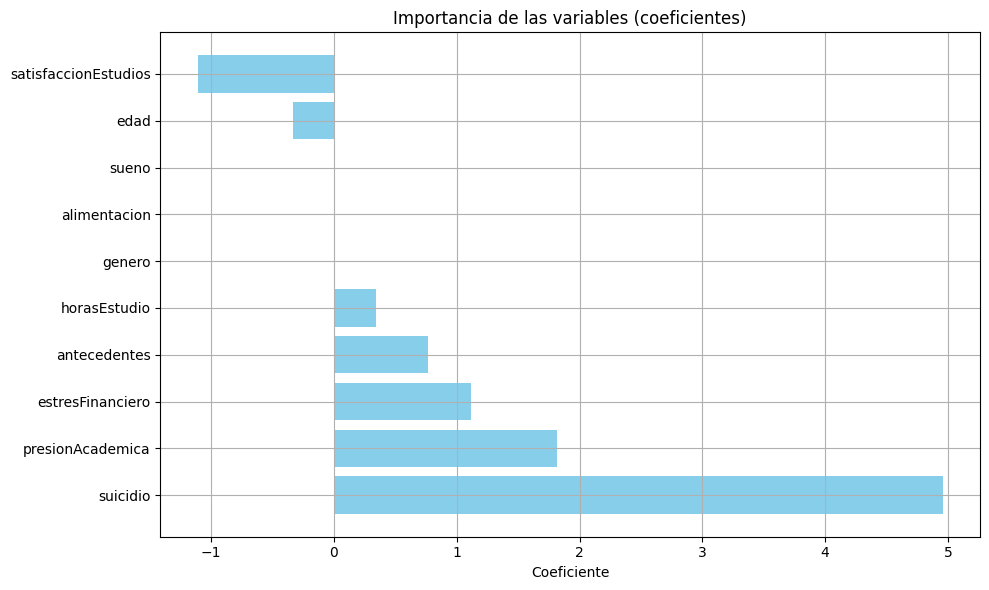

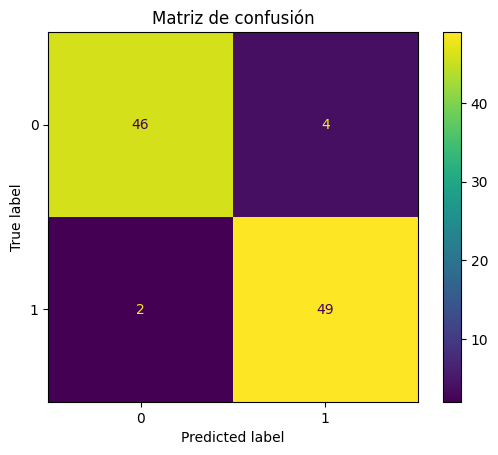

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.92      0.96      0.94        51

    accuracy                           0.94       101
   macro avg       0.94      0.94      0.94       101
weighted avg       0.94      0.94      0.94       101

Probabilidades de depresión (primeros 10):
[5.85045091e-06 7.40716212e-01 7.95414687e-01 6.53028334e-01
 6.22436605e-01 2.66256228e-03 1.58797514e-01 9.93387208e-01
 1.36203327e-04 9.86381760e-01]


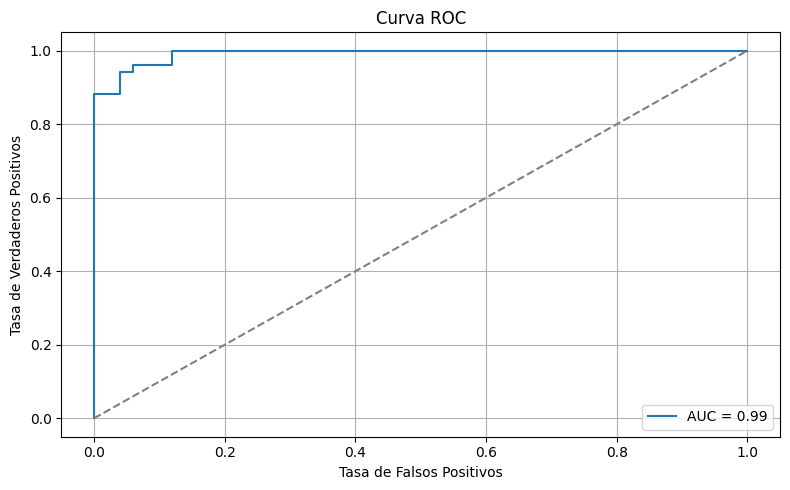

In [50]:
import pandas as pd

coeficientes = model.coef_[0]
caracteristicas = X_train.columns

df_coef = pd.DataFrame({
    "Variable": caracteristicas,
    "Coeficiente": coeficientes
}).sort_values(by="Coeficiente", ascending=False)

print(df_coef)

print("Intercepto (bias):", model.intercept_[0])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(df_coef["Variable"], df_coef["Coeficiente"], color="skyblue")
plt.title("Importancia de las variables (coeficientes)")
plt.xlabel("Coeficiente")
plt.grid(True)
plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de confusión")
plt.show()

from sklearn.metrics import classification_report

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
print("Probabilidades de depresión (primeros 10):")
print(y_prob[:10])

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
